In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from astropy.table import Table

file_PAN = 'MyTable1_Dedulek.fit'
file_RTT = 'XMMJ184_LC_20200709.fits'
file_RTT_col = 'XMMJ184_COLORS_20200709.fits'

In [2]:
hdul_PAN = fits.open(file_PAN)
hdul_RTT = fits.open(file_RTT)
hdul_RTT_col = fits.open(file_RTT_col)


In [3]:
#hdul_RTT.info()
PAN = pd.DataFrame(hdul_PAN[1].data)
RTT = Table().read(hdul_RTT[1], hdu=1)
RTT_col = Table().read(hdul_RTT_col[1], hdu=1)

In [4]:
PAN_coor = np.array((PAN.raMean,PAN.decMean))
#RTT_c = pd.DataFrame(RTT.columns[1],RTT.columns[2])
RTT_coor = np.array((RTT.columns[1],RTT.columns[2]))

In [5]:
tol = .5
N = RTT_coor.shape[1]
tol2 = tol*tol/3600.0/3600.0 # radius in square

In [6]:
correl_obj = np.zeros((N,2),dtype = np.int32)

In [7]:
r_mean = np.zeros(N)
i_mean = np.zeros(N)
z_mean = np.zeros(N)
#print(r_mean.shape)
for i in range(N):
    if np.sum(np.isnan(RTT.columns['r_PSF'][i])) != 4:
         r_mean[i] = np.nanmedian(RTT.columns['r_PSF'][i])
    if np.sum(np.isnan(RTT.columns['i_PSF'][i])) != 5:
         i_mean[i] = np.nanmedian(RTT.columns['i_PSF'][i])
    if np.sum(np.isnan(RTT.columns['z_PSF'][i])) != 5:
         z_mean[i] = np.nanmedian(RTT.columns['z_PSF'][i])

In [8]:
rPAN = np.array(PAN.rMeanPSFMag)
iPAN = np.array(PAN.iMeanPSFMag)
zPAN = np.array(PAN.zMeanPSFMag)
riPAN = rPAN - iPAN
izPAN = iPAN - zPAN
rzPAN = rPAN - zPAN

for i in range(N):
    if (r_mean[i] <= 23 and r_mean[i] >= 13):
        r2 = (PAN_coor[0,:] - RTT_coor[0,i])**2 + (PAN_coor[1,:] - RTT_coor[1,i])**2
        j = np.argmin(r2) # choose the minimum value
        if (r2[j] <= tol2 and  rPAN[j] >= 13 and rPAN[j] <= 23):  
            correl_obj[i,0] = i
            correl_obj[i,1] = j       

In [10]:
coord = [278.215146, -10.0181608] 

tol = 10
tol2 = tol*tol/3600.0/3600.0 # radius in square
r2 = (RTT_coor[0,:] - coord[0])**2 + (RTT_coor[1,:] - coord[1])**2
i = r2 <= tol2

for j in range(3): 
    print(PAN_coor[0,correl_obj[i][j,1]],PAN_coor[1,correl_obj[i][j,1]],RTT_coor[0,correl_obj[i][j,0]],RTT_coor[1,correl_obj[i][j,0]],rPAN[correl_obj[i][j,1]],r_mean[correl_obj[i][j,0]],iPAN[correl_obj[i][j,1]],i_mean[correl_obj[i][j,0]],zPAN[correl_obj[i][j,1]],z_mean[correl_obj[i][j,0]])


278.21416645 -10.01863661 278.21414554656025 -10.018646660006016 20.839099884033203 20.802629470825195 19.590999603271484 19.545616149902344 18.85610008239746 18.77821922302246
278.21509657 -10.0199632 278.21507573884776 -10.01994054530383 20.54400062561035 20.644573211669922 19.405799865722656 19.355636596679688 18.675899505615234 18.622451782226562
278.21650269 -10.01712318 278.21647523436707 -10.017121850239414 15.828499794006348 15.819031715393066 14.717499732971191 14.689648628234863 14.048999786376953 14.002851486206055


In [43]:
ri_mean = np.empty(N)
iz_mean = np.empty(N)
for i in range(N):
    if np.sum(np.isnan(RTT_col.columns['ri_PSF'][i])) != 4:
         ri_mean[i] = np.nanmedian(RTT_col.columns['ri_PSF'][i])
    if np.sum(np.isnan(RTT_col.columns['iz_PSF'][i])) != 5:
         iz_mean[i] = np.nanmedian(RTT_col.columns['iz_PSF'][i])

In [44]:
correl_obj = correl_obj[np.nonzero(correl_obj[:,0])]

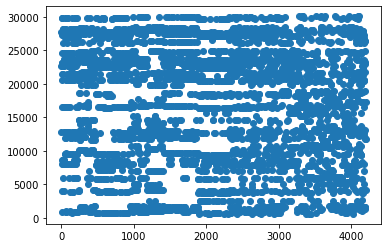

In [45]:
plt.scatter(np.arange(correl_obj.shape[0]),correl_obj[:,1])

In [125]:
plot_file = 'RTT-PAN_col.pdf'
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(plot_file) as pdf:
    print('\nPSF LIGHTCURVES: ')
#    jd_min = np.min(lc_tab[jd_col_name[0]][ii])
#    jd_max = np.max(lc_tab[jd_col_name[0]][ii])
#    for i in range(1, len(flts)):
#        v = np.min(lc_tab[jd_col_name[i]][ii])
#        if v < jd_min:
#            jd_min = v
#        v = np.max(lc_tab[jd_col_name[i]][ii])
#        if v > jd_max:
#            jd_max = v

#    r = (jd_max - jd_min) / 20
#    jd_min -= r
#    jd_max += r
    N_p = 2
    plt.figure(figsize=[3,6])
    plt.subplots_adjust(hspace=1)
    for i in range(N_p):
        if i == 0:
            ax = plt.subplot(N_p, 1, i + 1, xlabel='RTT_col', ylabel='PAN_col', title='r-i', ylim = [-2,+4],
                              autoscalex_on=False, xlim= [-2,+4])
        else:
            plt.subplot(N_p, 1, i + 1, xlabel='RTT_col', ylabel='PAN_col', title = 'i-z', sharex=ax, sharey=ax)

        plt.scatter(ri_mean[correl_obj[:,0]], riPAN[correl_obj[:,1]])
        #print('\t{}:'.format(flts[i]))
        #print('\t\t', lc_tab[col_psf_name[i]][ii])
        #print('\t\t', lc_tab[col_err_psf_name[i]][ii])

    pdf.savefig()
    plt.close()


PSF LIGHTCURVES: 


In [62]:
r1 = i_mean[correl_obj[:,0]]
r2 = iPAN[correl_obj[:,1]]
N1 = r1.shape[0]
mask = np.empty(N1)
for i in range(N1):
    if (r1[i] >= 13 and r1[i] <= 23 and r2[i] >= 13 and r2[i] <= 23):
            mask[i] = 1
    else:
            mask[i] = 0
mask1 = np.nonzero(mask)
r1 = r1[mask1]
r2 = r2[mask1]
c = np.polyfit(r1, r2, 1)

from scipy import stats
res = stats.siegelslopes(r2, r1)
res


(1.0055302866949267, -0.09692952831739987)

(array([ 35.,  62., 116., 202., 273., 375., 584., 705., 761., 629., 146.]),
 array([14.23159981, 14.83870888, 15.44581795, 16.05292702, 16.66003609,
        17.26714516, 17.87425423, 18.4813633 , 19.08847237, 19.69558144,
        20.30269051, 20.90979958]),
 <BarContainer object of 11 artists>)

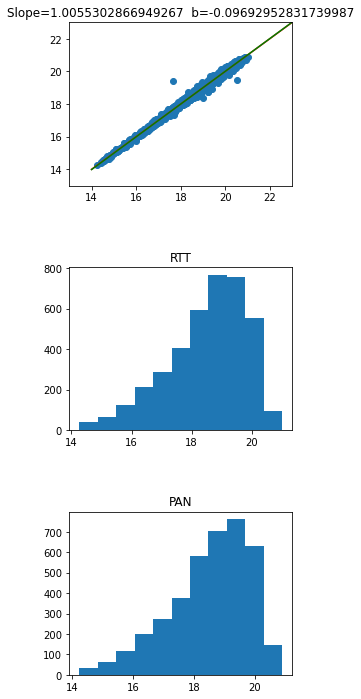

In [65]:
f = plt.figure(figsize=(4,12))
plt.subplots_adjust(hspace=0.5)
ax = plt.subplot(3,1,1, ylim=[13,23], xlim=[13,23])
plt.scatter(r1,r2)
plt.title('Slope='+str(res[0])+'  b='+str(res[1]))
x = np.arange(10)+14
plt.plot(x,np.polyval(c,x), c ='r')
plt.plot(x,np.polyval(res,x), c ='g' )
ax = plt.subplot(3,1,2, title='RTT')
plt.hist(r1, 11)
ax = plt.subplot(3,1,3, title='PAN')
plt.hist(r2, 11)
#ax = plt.subplot(3,1,2, ylim=[13,24], xlim=[13,23])
#plt.scatter(i_mean[correl_obj[:,0]],iPAN[correl_obj[:,1]])
#ax = plt.subplot(3,1,3, ylim=[13,24], xlim=[13,23])
#plt.scatter(z_mean[correl_obj[:,0]],zPAN[correl_obj[:,1]])
#plt.savefig('slope+hist_z.pdf')

In [63]:
np.median(r1-r2), np.std(r1-r2)

(-0.0033626556396484375, 0.08294376368092471)